<a href="https://colab.research.google.com/github/kavyakapoor200/Personalized-student-recommendations/blob/main/Kavya_Testline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Available User IDs: ['YcDFSO4ZukTJnnFMgRNVwZTE4j42']

Enter the User ID you want to analyze (or type 'exit' to quit): YcDFSO4ZukTJnnFMgRNVwZTE4j42



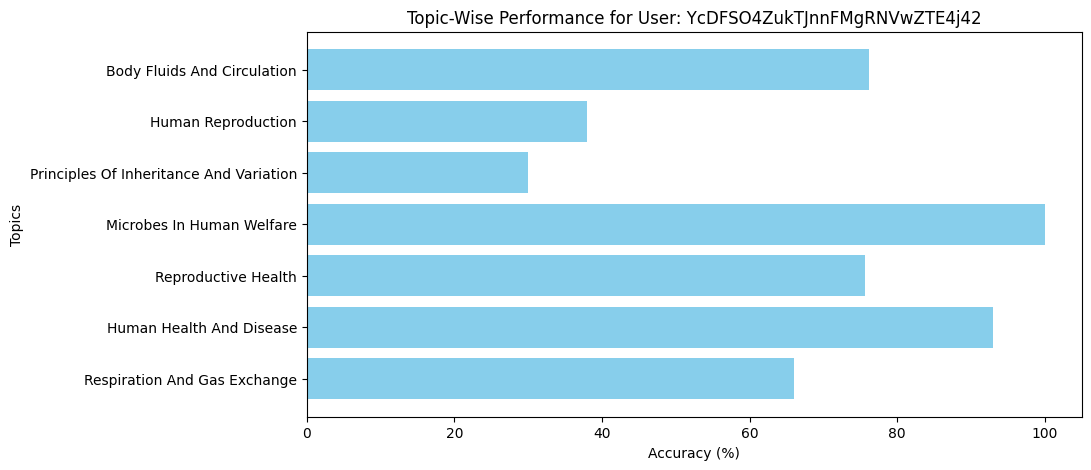


Quiz Performance Analysis Results:
User ID: YcDFSO4ZukTJnnFMgRNVwZTE4j42
Overall Accuracy: 72.21%

Topic Performance:
   Body Fluids And Circulation: 76.17%
   Human Reproduction: 38.00%
   Principles Of Inheritance And Variation: 30.00%
   Microbes In Human Welfare: 100.00%
   Reproductive Health: 75.67%
   Human Health And Disease: 93.00%
   Respiration And Gas Exchange: 66.00%

Student Persona: The Emerging Talent with strengths in Microbes In Human Welfare and challenges in Principles Of Inheritance And Variation

Personalized Recommendations:
   - Your performance in Reproductive Health is declining. Revise key concepts and attempt previous year's questions.
   - Weak Areas: Spend extra time on Principles Of Inheritance And Variation, Human Reproduction. Focus on NCERT-based questions and detailed explanations.
   - You're excelling in Human Health And Disease, Microbes In Human Welfare. Maintain consistency with regular quizzes.
   - Build a solid foundation with basic concept c

In [3]:
import requests
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from collections import defaultdict
from datetime import datetime

CURRENT_QUIZ_URL = "https://api.jsonserve.com/rJvd7g"
HISTORICAL_QUIZ_URL = "https://api.jsonserve.com/XgAgFJ"

def fetch_data(url):
    try:
        response = requests.get(url)
        response.raise_for_status()
        return response.json()
    except Exception as e:
        print(f"Error fetching data: {e}")
        return None

current_quiz_data = fetch_data(CURRENT_QUIZ_URL)
historical_quiz_data = fetch_data(HISTORICAL_QUIZ_URL)

# Function to calculate overall accuracy
def calculate_overall_accuracy(quiz_history):
    accuracies = [float(quiz.get('accuracy', '0 %').strip('%')) for quiz in quiz_history]
    return np.mean(accuracies) if accuracies else 0

# Function to analyze topic-wise performance
def analyze_topic_performance(user_history):
    topic_scores = defaultdict(list)
    for quiz in user_history:
        topic = quiz.get('quiz', {}).get('topic', 'Unknown').strip().title()
        accuracy = float(quiz.get('accuracy', '0').strip('%') or 0)
        topic_scores[topic].append(accuracy)
    return {topic: sum(scores) / len(scores) for topic, scores in topic_scores.items()}

# Function to determine student persona
def generate_student_persona(overall_accuracy, topic_performance):
    if overall_accuracy >= 80:
        persona = "The Scholar"
    elif overall_accuracy >= 60:
        persona = "The Emerging Talent"
    else:
        persona = "The Potential Learner"

    if topic_performance:
        weakest_topic = min(topic_performance, key=topic_performance.get)
        strongest_topic = max(topic_performance, key=topic_performance.get)
        return f"{persona} with strengths in {strongest_topic} and challenges in {weakest_topic}"

    return persona

# Function to generate personalized recommendations
def generate_recommendations(topic_performance, user_history):
    recommendations = []
    sorted_topics = sorted(topic_performance.items(), key=lambda x: x[1])
    weak_topics = [t[0] for t in sorted_topics[:2]]
    strong_topics = [t[0] for t in sorted_topics[-2:]]
    last_attempts = defaultdict(list)

    for quiz in user_history:
        topic = quiz.get('quiz', {}).get('topic', 'Unknown').strip().title()
        accuracy = float(quiz.get('accuracy', '0').strip('%') or 0)
        last_attempts[topic].append(accuracy)

    declining_topics = [topic for topic, scores in last_attempts.items() if len(scores) >= 3 and scores[-1] < scores[-2] < scores[-3]]

    if declining_topics:
        recommendations.append(f"Your performance in {', '.join(declining_topics)} is declining. Revise key concepts and attempt previous year's questions.")

    if weak_topics:
        recommendations.append(f"Weak Areas: Spend extra time on {', '.join(weak_topics)}. Focus on NCERT-based questions and detailed explanations.")

    if strong_topics:
        recommendations.append(f"You're excelling in {', '.join(strong_topics)}. Maintain consistency with regular quizzes.")

    recommendations.append("Build a solid foundation with basic concept clarity before advancing.")
    return recommendations

# Function to plot topic-wise performance (Bar Chart)
def plot_topic_performance(topic_performance, user_id):
    topics = list(topic_performance.keys())
    scores = list(topic_performance.values())

    plt.figure(figsize=(10, 5))
    plt.barh(topics, scores, color='skyblue')
    plt.xlabel('Accuracy (%)')
    plt.ylabel('Topics')
    plt.title(f'Topic-Wise Performance for User: {user_id}')
    plt.gca().invert_yaxis()
    plt.show()

# Function to analyze user performance
def analyze_performance(user_id, historical_quiz_data):
    user_history = [quiz for quiz in historical_quiz_data if quiz.get('user_id') == user_id]

    if not user_history:
        print(f"No quiz history found for user ID: {user_id}")
        return None

    overall_accuracy = calculate_overall_accuracy(user_history)
    topic_performance = analyze_topic_performance(user_history)
    student_persona = generate_student_persona(overall_accuracy, topic_performance)
    recommendations = generate_recommendations(topic_performance, user_history)

    # Display Graph
    plot_topic_performance(topic_performance, user_id)

    return {
        'overall_accuracy': overall_accuracy,
        'topic_performance': topic_performance,
        'student_persona': student_persona,
        'recommendations': recommendations
    }

# Fetch all unique user IDs from historical data
user_ids = set(str(quiz.get('user_id')) for quiz in historical_quiz_data if quiz.get('user_id') is not None)
print("\nAvailable User IDs:", list(user_ids))

if user_ids:
    while True:
        selected_user_id = input("\nEnter the User ID you want to analyze (or type 'exit' to quit): ").strip()

        if selected_user_id.lower() == 'exit':
            print("Exiting program.")
            break

        if selected_user_id in user_ids:
            print("\n" + "="*50)
            analysis_results = analyze_performance(selected_user_id, historical_quiz_data)

            if analysis_results:
                print("\nQuiz Performance Analysis Results:")
                print(f"User ID: {selected_user_id}")
                print(f"Overall Accuracy: {analysis_results['overall_accuracy']:.2f}%")

                print("\nTopic Performance:")
                for topic, score in analysis_results['topic_performance'].items():
                    print(f"   {topic}: {score:.2f}%")

                print(f"\nStudent Persona: {analysis_results['student_persona']}")

                print("\nPersonalized Recommendations:")
                for recommendation in analysis_results['recommendations']:
                    print(f"   - {recommendation}")
            else:
                print(f"No quiz history found for user ID: {selected_user_id}")
        else:
            print("Invalid User ID! Please enter a valid User ID from the list above.")
else:
    print("No user IDs found in the data.")
